# Hands on - Applied data engineering with Pandas

### ...or creating a simple ETL process

In this hands-on session, we will again work with the data from the ACM case. However, in the last module some data scientists have already invested some time in data engineering and wrangling.

Given our newly gained pandas skills, we now want to follow their path...


# 1) Importing Files

Import the survey data into pandas. However, the survey data is stored in three different sheets in the data file ("2019", "2020", and "2021"). Load them into pandas.


In [23]:
import pandas as pd

In [24]:
survey2019 = pd.read_excel("https://github.com/casbdai/notebooks2023/raw/main/Module2/DataEngineeringPandas/Pandas_TV_Survey_Data.xlsx", sheet_name="2019")

In [25]:
survey2020 = pd.read_excel("https://github.com/casbdai/notebooks2023/raw/main/Module2/DataEngineeringPandas/Pandas_TV_Survey_Data.xlsx", sheet_name="2020")

In [26]:
survey2021 = pd.read_excel("https://github.com/casbdai/notebooks2023/raw/main/Module2/DataEngineeringPandas/Pandas_TV_Survey_Data.xlsx", sheet_name="2021")

Have a look at the three dataframes. They all have the same sructure and identical variable names. Paste theme together into a new dataframe.

In [27]:
survey2019.head()

,DateAired,IndustryAdType,ProgramName,Spend,GRP,Impressions,gravity,relatability,heart,originality,adrenaline,smarts,passion,edge,Country,State
0,2019-04-13,Healthy Fast Food Chain,Planet Hypothesis,147051.0,9.658,11183903.0,-1.370,0.929,-0.434,1.595,-1.561,-1.007,-0.164,4.322,United States,Delaware
1,2019-04-13,Healthy Fast Food Chain,New Gal,387.0,0.163,188746.0,-0.938,0.880,0.450,-0.099,-1.244,-1.628,0.661,0.385,United States,Kentucky
2,2019-04-13,Healthy Fast Food Chain,Sister Home Sellers,78814.0,5.274,6106398.0,1.501,1.109,-0.560,0.399,1.185,-0.005,-0.101,0.149,United States,Hawaii
3,2019-04-13,Healthy Fast Food Chain,Freaky Vacations,178700.0,8.658,10026367.0,-1.483,0.036,0.390,-1.429,1.751,0.413,1.997,0.389,United States,Washington
4,2019-04-13,Healthy Fast Food Chain,Maui Five Ten,208500.0,5.241,6068858.0,-0.479,1.473,-0.205,0.327,0.773,-0.955,2.105,-0.217,United States,Florida


In [28]:
survey2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateAired       2463 non-null   datetime64[ns]
 1   IndustryAdType  2463 non-null   object        
 2   ProgramName     2463 non-null   object        
 3   Spend           2463 non-null   float64       
 4   GRP             2463 non-null   float64       
 5   Impressions     2463 non-null   float64       
 6   gravity         2463 non-null   float64       
 7   relatability    2463 non-null   float64       
 8   heart           2463 non-null   float64       
 9   originality     2463 non-null   float64       
 10  adrenaline      2463 non-null   float64       
 11  smarts          2463 non-null   float64       
 12  passion         2463 non-null   float64       
 13  edge            2463 non-null   float64       
 14  Country         2463 non-null   object        
 15  Stat

In [29]:
survey2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateAired       3900 non-null   datetime64[ns]
 1   IndustryAdType  3900 non-null   object        
 2   ProgramName     3900 non-null   object        
 3   Spend           3900 non-null   float64       
 4   GRP             3900 non-null   float64       
 5   Impressions     3900 non-null   float64       
 6   gravity         3900 non-null   float64       
 7   relatability    3900 non-null   float64       
 8   heart           3900 non-null   float64       
 9   originality     3900 non-null   float64       
 10  adrenaline      3900 non-null   float64       
 11  smarts          3900 non-null   float64       
 12  passion         3900 non-null   float64       
 13  edge            3900 non-null   float64       
 14  Country         3900 non-null   object        
 15  Stat

In [30]:
survey2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateAired       1483 non-null   datetime64[ns]
 1   IndustryAdType  1483 non-null   object        
 2   ProgramName     1483 non-null   object        
 3   Spend           1483 non-null   float64       
 4   GRP             1483 non-null   float64       
 5   Impressions     1483 non-null   float64       
 6   gravity         1483 non-null   float64       
 7   relatability    1483 non-null   float64       
 8   heart           1483 non-null   float64       
 9   originality     1483 non-null   float64       
 10  adrenaline      1483 non-null   float64       
 11  smarts          1483 non-null   float64       
 12  passion         1483 non-null   float64       
 13  edge            1483 non-null   float64       
 14  Country         1483 non-null   object        
 15  Stat

Combine files row-wise or column-wise

*   set **axis=0** to row-wise combination
*   set **axis=1** to row-wise combination

In [31]:
survey = pd.concat([survey2019, survey2020, survey2021], axis = 0)

Now also read in the intentionality results using an appropriate reading function. Watch out for the delimeter!



In [32]:
intentionality = pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module2/DataEngineeringPandas/Pandas_TV_Intentionality_Data.csv", sep=";")

We need to fix the variable type of "date"

In [33]:
intentionality.date = pd.to_datetime(intentionality.date)
intentionality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            7846 non-null   datetime64[ns]
 1   IndustryAdType  7846 non-null   object        
 2   ProgramName     7846 non-null   object        
 3   Intentionality  7846 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 245.3+ KB


In [34]:
gtrends = pd.read_excel("https://github.com/casbdai/notebooks2023/raw/main/Module2/DataEngineeringPandas/Pandas_TV_GTrends_Data.xlsx")
gtrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            473 non-null    datetime64[ns]
 1   IndustryAdType  473 non-null    object        
 2   GTrend          473 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.2+ KB


# 2) Merging Files

Now after having loaded the data, we want to combine the data into one overarching data set. However, be aware that the data needs to be joined on three variables: Industry Ad Type, Program Name and date / Date Aired

Perform an inner join of the data.

In [35]:
inner =  pd.merge(survey, intentionality,
                  how="inner",
                  left_on=["IndustryAdType", "ProgramName", "DateAired"],
                  right_on=["IndustryAdType", "ProgramName", "date"])

inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateAired       7101 non-null   datetime64[ns]
 1   IndustryAdType  7101 non-null   object        
 2   ProgramName     7101 non-null   object        
 3   Spend           7101 non-null   float64       
 4   GRP             7101 non-null   float64       
 5   Impressions     7101 non-null   float64       
 6   gravity         7101 non-null   float64       
 7   relatability    7101 non-null   float64       
 8   heart           7101 non-null   float64       
 9   originality     7101 non-null   float64       
 10  adrenaline      7101 non-null   float64       
 11  smarts          7101 non-null   float64       
 12  passion         7101 non-null   float64       
 13  edge            7101 non-null   float64       
 14  Country         7101 non-null   object        
 15  Stat

Perform an left join of the data

In [36]:
left =  pd.merge(survey, intentionality,
                  how='left',
                  left_on=["IndustryAdType", "ProgramName", "DateAired"],
                  right_on=["IndustryAdType", "ProgramName", "date"])

left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateAired       10314 non-null  datetime64[ns]
 1   IndustryAdType  10314 non-null  object        
 2   ProgramName     10314 non-null  object        
 3   Spend           10314 non-null  float64       
 4   GRP             10314 non-null  float64       
 5   Impressions     10314 non-null  float64       
 6   gravity         10314 non-null  float64       
 7   relatability    10314 non-null  float64       
 8   heart           10314 non-null  float64       
 9   originality     10314 non-null  float64       
 10  adrenaline      10314 non-null  float64       
 11  smarts          10314 non-null  float64       
 12  passion         10314 non-null  float64       
 13  edge            10314 non-null  float64       
 14  Country         10314 non-null  object        
 15  St

In [37]:
left.head()

,DateAired,IndustryAdType,ProgramName,Spend,GRP,Impressions,gravity,relatability,heart,originality,adrenaline,smarts,passion,edge,Country,State,date,Intentionality
0,2019-04-13,Healthy Fast Food Chain,Planet Hypothesis,147051.0,9.658,11183903.0,-1.370,0.929,-0.434,1.595,-1.561,-1.007,-0.164,4.322,United States,Delaware,2019-04-13,0.152
1,2019-04-13,Healthy Fast Food Chain,Planet Hypothesis,147051.0,9.658,11183903.0,-1.370,0.929,-0.434,1.595,-1.561,-1.007,-0.164,4.322,United States,Delaware,2019-04-13,0.152
2,2019-04-13,Healthy Fast Food Chain,New Gal,387.0,0.163,188746.0,-0.938,0.880,0.450,-0.099,-1.244,-1.628,0.661,0.385,United States,Kentucky,2019-04-13,-0.198
3,2019-04-13,Healthy Fast Food Chain,Sister Home Sellers,78814.0,5.274,6106398.0,1.501,1.109,-0.560,0.399,1.185,-0.005,-0.101,0.149,United States,Hawaii,2019-04-13,0.256
4,2019-04-13,Healthy Fast Food Chain,Freaky Vacations,178700.0,8.658,10026367.0,-1.483,0.036,0.390,-1.429,1.751,0.413,1.997,0.389,United States,Washington,2019-04-13,-0.094


How many NaNs are introduced in the variable intentionality? (you can use .info() )

In [38]:
13527-10314

3213

Number of NaN: 3213

Which joining method would you use for combining the two dataframe? Why?

Your answer: left outer. You will get all the rows from both datasets.

In [41]:
left =  pd.merge(left, gtrends,
                  how="left",
                  left_on=["IndustryAdType", "DateAired"],
                  right_on=["IndustryAdType", "date"]
                  )

left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateAired       10314 non-null  datetime64[ns]
 1   IndustryAdType  10314 non-null  object        
 2   ProgramName     10314 non-null  object        
 3   Spend           10314 non-null  float64       
 4   GRP             10314 non-null  float64       
 5   Impressions     10314 non-null  float64       
 6   gravity         10314 non-null  float64       
 7   relatability    10314 non-null  float64       
 8   heart           10314 non-null  float64       
 9   originality     10314 non-null  float64       
 10  adrenaline      10314 non-null  float64       
 11  smarts          10314 non-null  float64       
 12  passion         10314 non-null  float64       
 13  edge            10314 non-null  float64       
 14  Country         10314 non-null  object        
 15  St

In [44]:
left.head()

,DateAired,IndustryAdType,ProgramName,Spend,GRP,Impressions,gravity,relatability,heart,originality,adrenaline,smarts,passion,edge,Country,State,date_x,Intentionality,date_y,GTrend
0,2019-04-13,Healthy Fast Food Chain,Planet Hypothesis,147051.0,9.658,11183903.0,-1.370,0.929,-0.434,1.595,-1.561,-1.007,-0.164,4.322,United States,Delaware,2019-04-13,0.152,2019-04-13,47.0
1,2019-04-13,Healthy Fast Food Chain,Planet Hypothesis,147051.0,9.658,11183903.0,-1.370,0.929,-0.434,1.595,-1.561,-1.007,-0.164,4.322,United States,Delaware,2019-04-13,0.152,2019-04-13,47.0
2,2019-04-13,Healthy Fast Food Chain,New Gal,387.0,0.163,188746.0,-0.938,0.880,0.450,-0.099,-1.244,-1.628,0.661,0.385,United States,Kentucky,2019-04-13,-0.198,2019-04-13,47.0
3,2019-04-13,Healthy Fast Food Chain,Sister Home Sellers,78814.0,5.274,6106398.0,1.501,1.109,-0.560,0.399,1.185,-0.005,-0.101,0.149,United States,Hawaii,2019-04-13,0.256,2019-04-13,47.0
4,2019-04-13,Healthy Fast Food Chain,Freaky Vacations,178700.0,8.658,10026367.0,-1.483,0.036,0.390,-1.429,1.751,0.413,1.997,0.389,United States,Washington,2019-04-13,-0.094,2019-04-13,47.0


# 3) Dealing with NA

In order to practice our "dealing with missing data skills", we have to decided to go with an outer join.

Create a new dataframe in which you have removed all missing values:

In [43]:
acmdata = left.dropna()
acmdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7101 entries, 0 to 10285
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateAired       7101 non-null   datetime64[ns]
 1   IndustryAdType  7101 non-null   object        
 2   ProgramName     7101 non-null   object        
 3   Spend           7101 non-null   float64       
 4   GRP             7101 non-null   float64       
 5   Impressions     7101 non-null   float64       
 6   gravity         7101 non-null   float64       
 7   relatability    7101 non-null   float64       
 8   heart           7101 non-null   float64       
 9   originality     7101 non-null   float64       
 10  adrenaline      7101 non-null   float64       
 11  smarts          7101 non-null   float64       
 12  passion         7101 non-null   float64       
 13  edge            7101 non-null   float64       
 14  Country         7101 non-null   object        
 15  State   

Create a new dataframe in which you insert 0 into the missing data fields of appropriate variables.

In [45]:
acmdata_0 = left.fillna(value=0)
acmdata_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateAired       10314 non-null  datetime64[ns]
 1   IndustryAdType  10314 non-null  object        
 2   ProgramName     10314 non-null  object        
 3   Spend           10314 non-null  float64       
 4   GRP             10314 non-null  float64       
 5   Impressions     10314 non-null  float64       
 6   gravity         10314 non-null  float64       
 7   relatability    10314 non-null  float64       
 8   heart           10314 non-null  float64       
 9   originality     10314 non-null  float64       
 10  adrenaline      10314 non-null  float64       
 11  smarts          10314 non-null  float64       
 12  passion         10314 non-null  float64       
 13  edge            10314 non-null  float64       
 14  Country         10314 non-null  object        
 15  St

# 4) Tranforming Variables

In the following exercises, we use the acmdata dataframe!

Rename the variable "Spend" into "Spend_in_000"

In [46]:
acmdata = acmdata.rename(columns={"Spend": "Spend_in_000"})
acmdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7101 entries, 0 to 10285
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateAired       7101 non-null   datetime64[ns]
 1   IndustryAdType  7101 non-null   object        
 2   ProgramName     7101 non-null   object        
 3   Spend_in_000    7101 non-null   float64       
 4   GRP             7101 non-null   float64       
 5   Impressions     7101 non-null   float64       
 6   gravity         7101 non-null   float64       
 7   relatability    7101 non-null   float64       
 8   heart           7101 non-null   float64       
 9   originality     7101 non-null   float64       
 10  adrenaline      7101 non-null   float64       
 11  smarts          7101 non-null   float64       
 12  passion         7101 non-null   float64       
 13  edge            7101 non-null   float64       
 14  Country         7101 non-null   object        
 15  State   

Delete the Variable "date"

In [47]:
del(acmdata["date_y"])
acmdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7101 entries, 0 to 10285
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateAired       7101 non-null   datetime64[ns]
 1   IndustryAdType  7101 non-null   object        
 2   ProgramName     7101 non-null   object        
 3   Spend_in_000    7101 non-null   float64       
 4   GRP             7101 non-null   float64       
 5   Impressions     7101 non-null   float64       
 6   gravity         7101 non-null   float64       
 7   relatability    7101 non-null   float64       
 8   heart           7101 non-null   float64       
 9   originality     7101 non-null   float64       
 10  adrenaline      7101 non-null   float64       
 11  smarts          7101 non-null   float64       
 12  passion         7101 non-null   float64       
 13  edge            7101 non-null   float64       
 14  Country         7101 non-null   object        
 15  State   

In [48]:
acmdata = acmdata.drop("date_x", axis = 1)
acmdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7101 entries, 0 to 10285
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateAired       7101 non-null   datetime64[ns]
 1   IndustryAdType  7101 non-null   object        
 2   ProgramName     7101 non-null   object        
 3   Spend_in_000    7101 non-null   float64       
 4   GRP             7101 non-null   float64       
 5   Impressions     7101 non-null   float64       
 6   gravity         7101 non-null   float64       
 7   relatability    7101 non-null   float64       
 8   heart           7101 non-null   float64       
 9   originality     7101 non-null   float64       
 10  adrenaline      7101 non-null   float64       
 11  smarts          7101 non-null   float64       
 12  passion         7101 non-null   float64       
 13  edge            7101 non-null   float64       
 14  Country         7101 non-null   object        
 15  State   

Aggregate the acmdata data frame by "IndustryAdType" using .mean()

In [51]:
!pip show pandas

Name: pandas
Version: 2.0.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distrib

In [52]:
acmdata.columns

Index(['DateAired', 'IndustryAdType', 'ProgramName', 'Spend_in_000', 'GRP',
       'Impressions', 'gravity', 'relatability', 'heart', 'originality',
       'adrenaline', 'smarts', 'passion', 'edge', 'Country', 'State',
       'Intentionality', 'GTrend'],
      dtype='object')

In [54]:
acmdata.groupby("IndustryAdType").mean(numeric_only="True")

,Spend_in_000,GRP,Impressions,gravity,relatability,heart,originality,adrenaline,smarts,passion,edge,Intentionality,GTrend
IndustryAdType,,,,,,,,,,,,,
Healthy Fast Food Chain,121884.656666,7.199453,1.238327e+07,-0.034525,0.427116,-0.267242,0.154826,0.043906,-0.673428,0.467972,0.394039,0.173020,51.707467
Home Cleaning Product,64535.471616,4.471790,5.205212e+06,-0.167638,0.615703,-0.382821,-0.167109,-0.141271,-0.726865,0.174817,0.204969,0.136576,50.659389
Online Dating Site,111163.842105,0.989000,2.670132e+06,0.122763,0.390868,0.276868,1.099237,0.564816,-1.141816,-0.365947,0.171789,0.222605,70.210526
Popular Soft Drink,6964.439306,1.326965,1.542726e+06,0.906566,0.478572,-0.470191,0.037717,0.597855,-0.261110,0.174873,-0.046364,0.164925,50.890173
Retail Big Box Store,82680.468079,6.052655,1.426442e+07,0.035182,0.454694,-0.363770,0.108879,0.093156,-0.675502,0.208119,0.370496,0.171726,46.612393


Aggregate the acm dataframe by "Industry Ad Type" and "Program Name" using .sum()

In [55]:
acmdata.groupby(["IndustryAdType", "ProgramName"]).sum(numeric_only=True)

Spend_in_000       GRP  \
IndustryAdType          ProgramName                                        
Healthy Fast Food Chain Cannot Fool Me                110266.0    25.794   
                        Daybreak Dish                1318122.0    22.347   
                        ER Drama                     8293804.0   497.434   
                        Family Fraud                  585763.0    79.959   
                        Fix and Flip                42891549.0  3984.787   
...                                                        ...       ...   
Retail Big Box Store    Tonight Tonight              1209787.0   276.792   
                        Tours of the Wild West       4750600.0   186.846   
                        Travel the World             5669188.0   103.013   
                        Waltzing with the Famous     1324046.0   149.631   
                        Weird Flavors                 387403.0    33.841   

                                                   Impressions  gravity  \
IndustryAdType          ProgramName                                       
Healthy Fast Food Chain Cannot Fool Me            3.002778e+07   -2.016   
                        Daybreak Dish             2.598428e+07   -4.895   
                        ER Drama                  5.316807e+08   81.667   
                        Family Fraud              9.302943e+07  -18.678   
                        Fix and Flip              5.880851e+09  328.868   
...                                                        ...      ...   
Retail Big Box Store    Tonight Tonight           3.216358e+08 -170.141   
                        Tours of the Wild West    2.169140e+08   -3.011   
                        Travel the World          1.199079e+08    5.407   
                        Waltzing with the Famous  1.813861e+08  150.934   
                        Weird Flavors             3.934036e+07   32.389   

                                                  relatability    heart  \
IndustryAdType          ProgramName                                       
Healthy Fast Food Chain Cannot Fool Me                 -33.748   -9.948   
                        Daybreak Dish                   -2.018   18.080   
                        ER Drama                        62.744  -89.399   
                        Family Fraud                   -71.488  -48.402   
                        Fix and Flip                   430.430 -278.508   
...                                                        ...      ...   
Retail Big Box Store    Tonight Tonight                -96.185  -33.439   
                        Tours of the Wild West         -54.144  -10.684   
                        Travel the World                -1.521   -1.461   
                        Waltzing with the Famous        62.533    3.795   
                        Weird Flavors                   29.141  123.286   

                                                  originality  adrenaline  \
IndustryAdType          ProgramName                                         
Healthy Fast Food Chain Cannot Fool Me                -15.360       7.294   
                        Daybreak Dish                  -6.458       1.862   
                        ER Drama                       86.196     207.145   
                        Family Fraud                   83.263     -82.506   
                        Fix and Flip                 -170.813     116.275   
...                                                       ...         ...   
Retail Big Box Store    Tonight Tonight               127.257       6.864   
                        Tours of the Wild West        -20.103      -7.910   
                        Travel the World               21.860      30.232   
                        Waltzing with the Famous       66.997     153.773   
                        Weird Flavors                  13.842     -12.775   

                                                   smarts  passion     edge  \
IndustryAdType          Prog

Again, aggregate the acmdata dataframe by "Industry Ad Type" and "Program Name" using .sum(). However, you are only interested in the "Spend" and "Impressions" data

In [59]:
acmdata.groupby(["IndustryAdType", "ProgramName"])[["Spend_in_000","Impressions"]].sum(numeric_only=True)

Spend_in_000   Impressions
IndustryAdType          ProgramName                                         
Healthy Fast Food Chain Cannot Fool Me                110266.0  3.002778e+07
                        Daybreak Dish                1318122.0  2.598428e+07
                        ER Drama                     8293804.0  5.316807e+08
                        Family Fraud                  585763.0  9.302943e+07
                        Fix and Flip                42891549.0  5.880851e+09
...                                                        ...           ...
Retail Big Box Store    Tonight Tonight              1209787.0  3.216358e+08
                        Tours of the Wild West       4750600.0  2.169140e+08
                        Travel the World             5669188.0  1.199079e+08
                        Waltzing with the Famous     1324046.0  1.813861e+08
                        Weird Flavors                 387403.0  3.934036e+07

[98 rows x 2 columns]

### Meaningful plots: Combining aggregations and .plot()

For creating more meaningful and Tableau-like plots in python, you have to combine aggregations with the .plot() method

<Axes: xlabel='DateAired'>

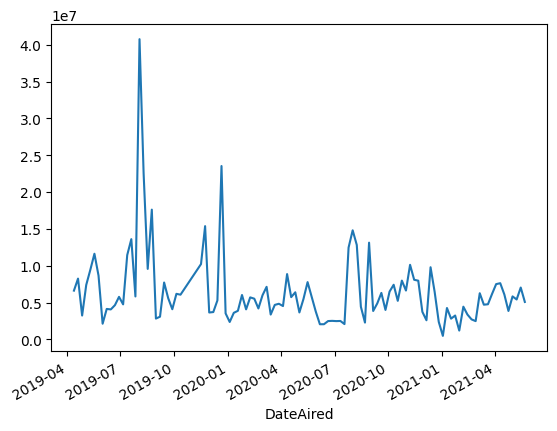

In [60]:
acmdata.groupby(["DateAired"])["Spend_in_000"].sum().plot()

a barplot of Spend by Program Name

<Axes: xlabel='ProgramName'>

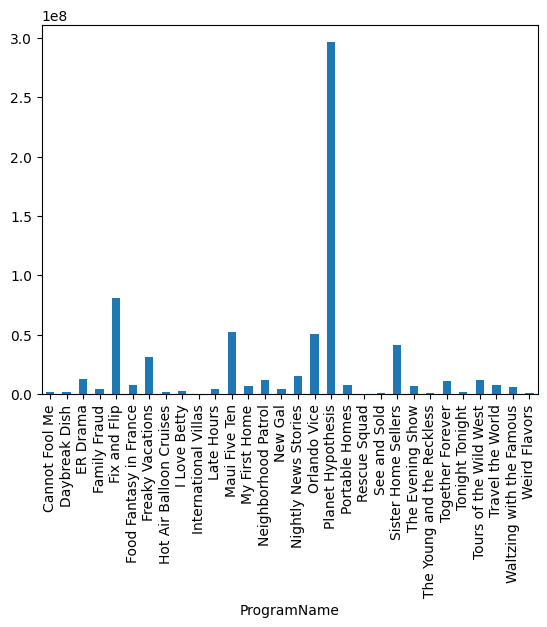

In [61]:
acmdata.groupby(["ProgramName"])["Spend_in_000"].sum().plot(kind="bar")

# Writing Data File

Now, write the merged and tidied data file as excel

In [63]:
acmdata.to_excel("data/acmdaCannot subset columns with a tuple with more than one element. Use a list instead.ta.xlsx", index=False)

In [ ]:
"""from google.colab import files
files.download('acmdata.xlsx')"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Or write the data into an SQL database

In [66]:
import sqlalchemy as db

engine = db.create_engine("sqlite:///data/cleaned_database")
engine.connect()

acmdata.to_sql('data/clean_acm_data', con=engine, if_exists="replace", index=False)

inspector = db.inspect(engine)
inspector.get_table_names()

['data/clean_acm_data']